# 1. Introdução

Nesse pequeno projeto, vamos analisar o desempenho de vendas de uma base de vendedores, medido pelo valor das vendas médias mensais de cada vendedor.

Nossa base tem 150 vendedores que estão divididos em três canais de vendas diferentes. Cada canal atende um segmento de cliente muito específico específico. Além disso, os vendeores com mais de seis meses de casa são considerados como 'veteranos' e aqueles com menos ou igual a seis meses são considerados como novatos.

O Objetivo do estudo é verificar se 
* Existe diferença de desempenho entre vendedores novos e veteranos?
* Existe diferença de desempenho entre os três canais

A venda média mensal contabiliza o total agregado de vendas de um vendedor, dividido pela quantidade de meses que aquele vendedor está na empresa. Esse indicado acaba compensandoo fato de que vendedores veteranos têm mais vendas acumuladas, além de ter uma carteira bemc consolidada. 

Se a análise fosse conduzida com muito rigor, seria necessário analisar a 'normalidade' da distribuição do valor_media_mes e, em caso negativo, seria necessário proceder alguma transformação daquela variável, usando a transformação de Box-Cox, por exemplo a fim de trazer a distribuição para mais perto da distribuição normal.

Nesse estudo, assumiremos que a amostra é normal ( embora esse não seja o caso, pois há outliers e a curva tem uma cauda longa para a esquerda ).

Para testar a normalidade, pode-se usar Shappiro-Wilk ou Kolmogoro-Smirnov.

Com a finalidade de testar se existe diferença de performance entre Veteranos e Novatos e entre canais, vamos usar a análise ANOVA 1-way

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
df = pd.read_csv('VENDA_MEDIA_MES.csv', header=0, sep=";")
display(df)

,vendedor_id,canal_id,tempo_funcao,venda_media_mes
0,V1,canal1,2,1000
1,V2,canal1,3,2000
2,V3,canal1,4,1000
3,V4,canal1,5,3000
4,V5,canal1,6,7000
...,...,...,...,...
145,V146,canal3,3,2000
146,V147,canal3,4,3000
147,V148,canal3,5,4000
148,V149,canal3,6,9000


In [3]:
# adding a new column, informing any vendor with less or equal 6 months is rookie else veteran

df.loc[df['tempo_funcao']> 6,'senioridade'] =   '1' #veterano
df.loc[df['tempo_funcao']<= 6,'senioridade'] =  '0' #rookie-novato
display(df)

,vendedor_id,canal_id,tempo_funcao,venda_media_mes,senioridade
0,V1,canal1,2,1000,0
1,V2,canal1,3,2000,0
2,V3,canal1,4,1000,0
3,V4,canal1,5,3000,0
4,V5,canal1,6,7000,0
...,...,...,...,...,...
145,V146,canal3,3,2000,0
146,V147,canal3,4,3000,0
147,V148,canal3,5,4000,0
148,V149,canal3,6,9000,0


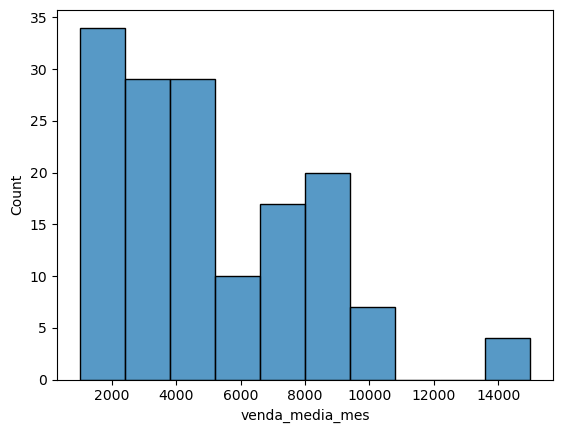

In [12]:
ax = sns.histplot(data=df,x='venda_media_mes')
plt.show()

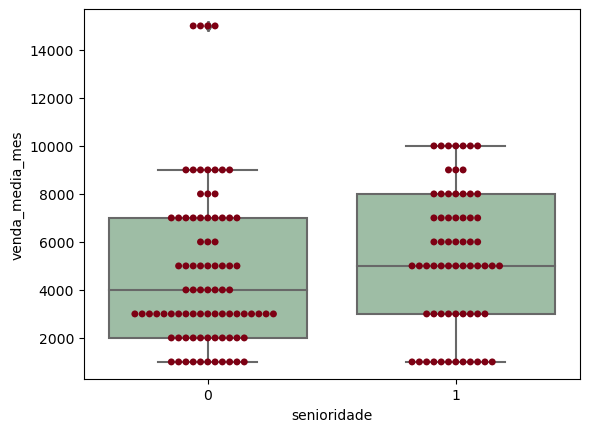

In [5]:
ax = sns.boxplot(x='senioridade', y='venda_media_mes', data=df, color='#99c2a2')
ax = sns.swarmplot(x="senioridade", y="venda_media_mes", data=df, color='#7d0013')
plt.show()

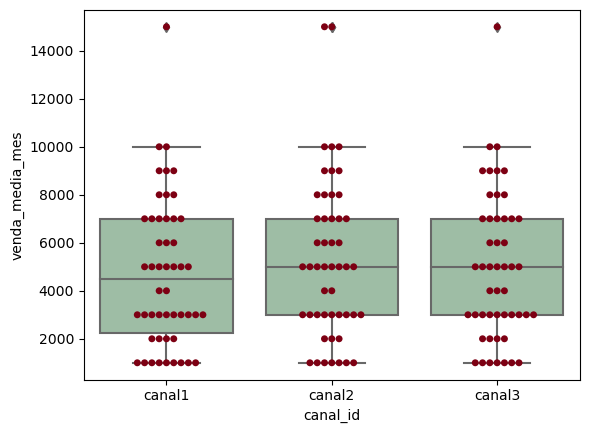

In [6]:
ax = sns.boxplot(x='canal_id', y='venda_media_mes', data=df, color='#99c2a2')
ax = sns.swarmplot(x="canal_id", y="venda_media_mes", data=df, color='#7d0013')
plt.show()

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('venda_media_mes ~ C(senioridade)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [8]:
# Ordinary Least Squares (OLS) model
model1 = ols('venda_media_mes ~ C(canal_id)', data=df).fit()
anova_table = sm.stats.anova_lm(model1, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(canal_id),9.213333e+06,2.0,0.456388,0.634462
Residual,1.483780e+09,147.0,NaN,NaN


# Conclusão
Nesse estudo simples, é possível concluir que não existe diferença de performance de vendedores entre os canais de vendas. Tão pouco existe diferença entre Novatos e Veteranos.
    Entretanto, é necessário fazer uma crítica bem importante em relação aos resultados pois os dados ( embora esses mesmos dados representem a população ) não estão distribuidos normalmente e talvez fosse necessãrio normalizá-los

##  USANDO A TRANSFORMAÇÃO DE DADOS COM BOX-COX PARA FAZER A ANÁLISE